In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

<h1>Linear Damage</h1>

In [2]:
df = pd.read_csv('input/results_complete_linear.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['elem_damaged', 'damage'], axis=1), df['elem_damaged'], test_size=0.10, random_state=41)

In [4]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

In [8]:
%%time
path = 'models/linear_class'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(655)))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(225, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                13120     
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 225)               4725      
                                                                 
Total params: 18,685
Trainable params: 18,685
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1266/1266 [==============================] - 2s 1ms/step - loss: 5.0588 - accuracy: 0.0477 - val_loss: 4.5615 - val_accuracy: 0.0973
Epoch 2/100
1266/1266 [==============

INFO:tensorflow:Assets written to: models/linear_class\assets


INFO:tensorflow:Assets written to: models/linear_class\assets


CPU times: total: 53.1 s
Wall time: 2min 52s


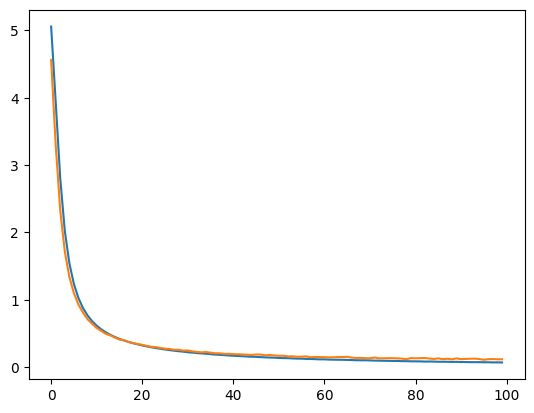

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [10]:
pred = model.predict(X_test)

141/141 [==============================] - 0s 830us/step


<h3>Classification Report</h3>

In [12]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        19
           1    1.00000   1.00000   1.00000        20
           2    1.00000   1.00000   1.00000        19
           3    0.95833   1.00000   0.97872        23
           4    1.00000   1.00000   1.00000        26
           5    1.00000   1.00000   1.00000        18
           6    0.96000   1.00000   0.97959        24
           7    1.00000   1.00000   1.00000        25
           8    1.00000   1.00000   1.00000        17
           9    1.00000   0.92308   0.96000        26
          10    0.96154   1.00000   0.98039        25
          11    1.00000   1.00000   1.00000        21
          12    1.00000   1.00000   1.00000        23
          13    1.00000   1.00000   1.00000        22
          14    1.00000   1.00000   1.00000        23
          15    1.00000   0.94444   0.97143        18
          16    0.94118   1.00000   0.96970        16
          17    0.78947   1

<h1>Exponential Damage</h1>

In [13]:
df_exp = pd.read_csv('input/results_complete_exponential.csv')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_exp.drop(['elem_damaged', 'damage'], axis=1), df_exp['elem_damaged'], test_size=0.10, random_state=41)

In [15]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

In [16]:
%%time
path = 'models\\exp_class'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(655)))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(225, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                13120     
                                                                 
 dense_13 (Dense)            (None, 20)                420       
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dense_15 (Dense)            (None, 225)               4725      
                                                                 
Total params: 18,685
Trainable params: 18,685
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1266/1266 [==============================] - 2s 1ms/step - loss: 4.8812 - accuracy: 0.0672 - val_loss: 4.1370 - val_accuracy: 0.1667
Epoch 2/100
1266/1266 [==============

INFO:tensorflow:Assets written to: models\exp_class\assets


INFO:tensorflow:Assets written to: models\exp_class\assets


CPU times: total: 52.2 s
Wall time: 2min 47s


In [17]:
pred = model.predict(X_test)

141/141 [==============================] - 0s 824us/step


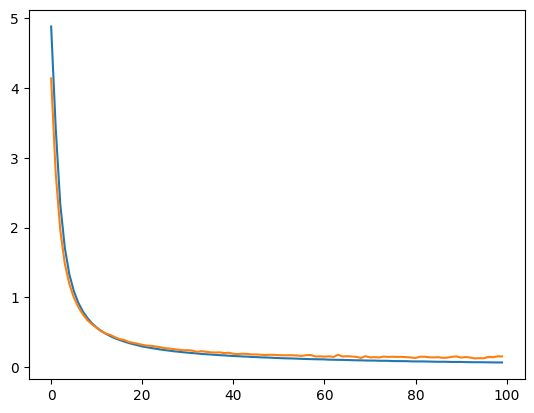

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

<h3>Classification Report</h3>

In [20]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        19
           1    1.00000   1.00000   1.00000        20
           2    0.95000   1.00000   0.97436        19
           3    1.00000   1.00000   1.00000        23
           4    1.00000   1.00000   1.00000        26
           5    1.00000   1.00000   1.00000        18
           6    1.00000   1.00000   1.00000        24
           7    1.00000   1.00000   1.00000        25
           8    1.00000   1.00000   1.00000        17
           9    1.00000   0.96154   0.98039        26
          10    1.00000   1.00000   1.00000        25
          11    0.95455   1.00000   0.97674        21
          12    0.95833   1.00000   0.97872        23
          13    1.00000   0.95455   0.97674        22
          14    1.00000   1.00000   1.00000        23
          15    1.00000   0.94444   0.97143        18
          16    0.94118   1.00000   0.96970        16
          17    1.00000   1

<h1>Sigmoid-like Damage</h1>

In [21]:
df_sig = pd.read_csv('input/results_complete_sigmoid_like.csv')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_sig.drop(['elem_damaged', 'damage'], axis=1), df_sig['elem_damaged'], test_size=0.10, random_state=41)

In [23]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

In [34]:
%%time
path = 'models/sig_class_test'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(655)))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(225, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy']) #.0001
    history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 80)                52480     
                                                                 
 dense_25 (Dense)            (None, 80)                6480      
                                                                 
 dense_26 (Dense)            (None, 80)                6480      
                                                                 
 dense_27 (Dense)            (None, 225)               18225     
                                                                 
Total params: 83,665
Trainable params: 83,665
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
1266/1266 [==============================] - 2s 2ms/step - loss: 4.9514 - accuracy: 0.1009 - val_loss: 4.3565 - val_accuracy: 0.2271
Epoch 2/300
1266/1266 [==============

INFO:tensorflow:Assets written to: models/sig_class_test\assets


INFO:tensorflow:Assets written to: models/sig_class_test\assets


CPU times: total: 2min 47s
Wall time: 9min 43s


In [35]:
pd.DataFrame(history.history).to_csv('output/history_mlp_class_sig.csv')

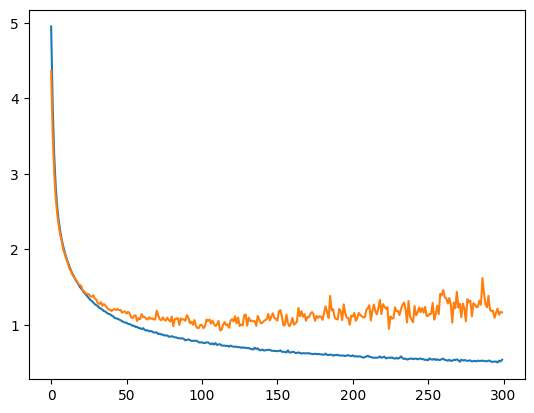

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [37]:
pred = model.predict(X_test)

141/141 [==============================] - 0s 933us/step


<h3>Classification Report</h3>

In [38]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       1.00      0.85      0.92        20
           2       0.76      1.00      0.86        19
           3       0.92      1.00      0.96        23
           4       1.00      0.81      0.89        26
           5       1.00      0.89      0.94        18
           6       1.00      0.92      0.96        24
           7       1.00      0.96      0.98        25
           8       1.00      1.00      1.00        17
           9       1.00      0.85      0.92        26
          10       1.00      1.00      1.00        25
          11       1.00      0.86      0.92        21
          12       0.92      0.96      0.94        23
          13       1.00      0.91      0.95        22
          14       1.00      0.96      0.98        23
          15       1.00      0.94      0.97        18
          16       0.94      0.94      0.94        16
          17       0.83    